In [1]:
# Neccesary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [2]:
# Create dataframe from csv
raw_df = pd.read_csv("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/code/pm6_energy/data/pm6_energy_v1_combined.csv")
raw_df

,Code,binding energy / kJ mol-1,no. of bonds,no of bonds to plot
0,DEMY,-118.149497,4,4
1,IEHE,-91.091083,4,4
2,ARRS,-88.923696,4,4
3,IEWD,-87.142676,4,4
4,YKRQ,-84.674518,3,3
...,...,...,...,...
37232,DRDR,73.807729,4,4
37233,SQDW,88.916555,4,4
37234,EYWY,89.952354,4,4
37235,SDYL,102.745411,4,4


In [3]:
# Drop NaN
df = raw_df.dropna()
df = df.drop(columns=['no. of bonds'])
df.head(10)

,Code,binding energy / kJ mol-1,no of bonds to plot
0,DEMY,-118.149497,4
1,IEHE,-91.091083,4
2,ARRS,-88.923696,4
3,IEWD,-87.142676,4
4,YKRQ,-84.674518,3
5,DWEQ,-84.319848,4
6,EYEY,-79.859127,4
7,AIEG,-75.071568,4
8,INNK,-74.825432,4
9,DEWH,-73.530919,4


In [4]:
# Define min and max values
min_value = df['binding energy / kJ mol-1'].min()
max_value = df['binding energy / kJ mol-1'].max()

In [5]:
# Calculate range
range = max_value - min_value
print(range)

221.2206237


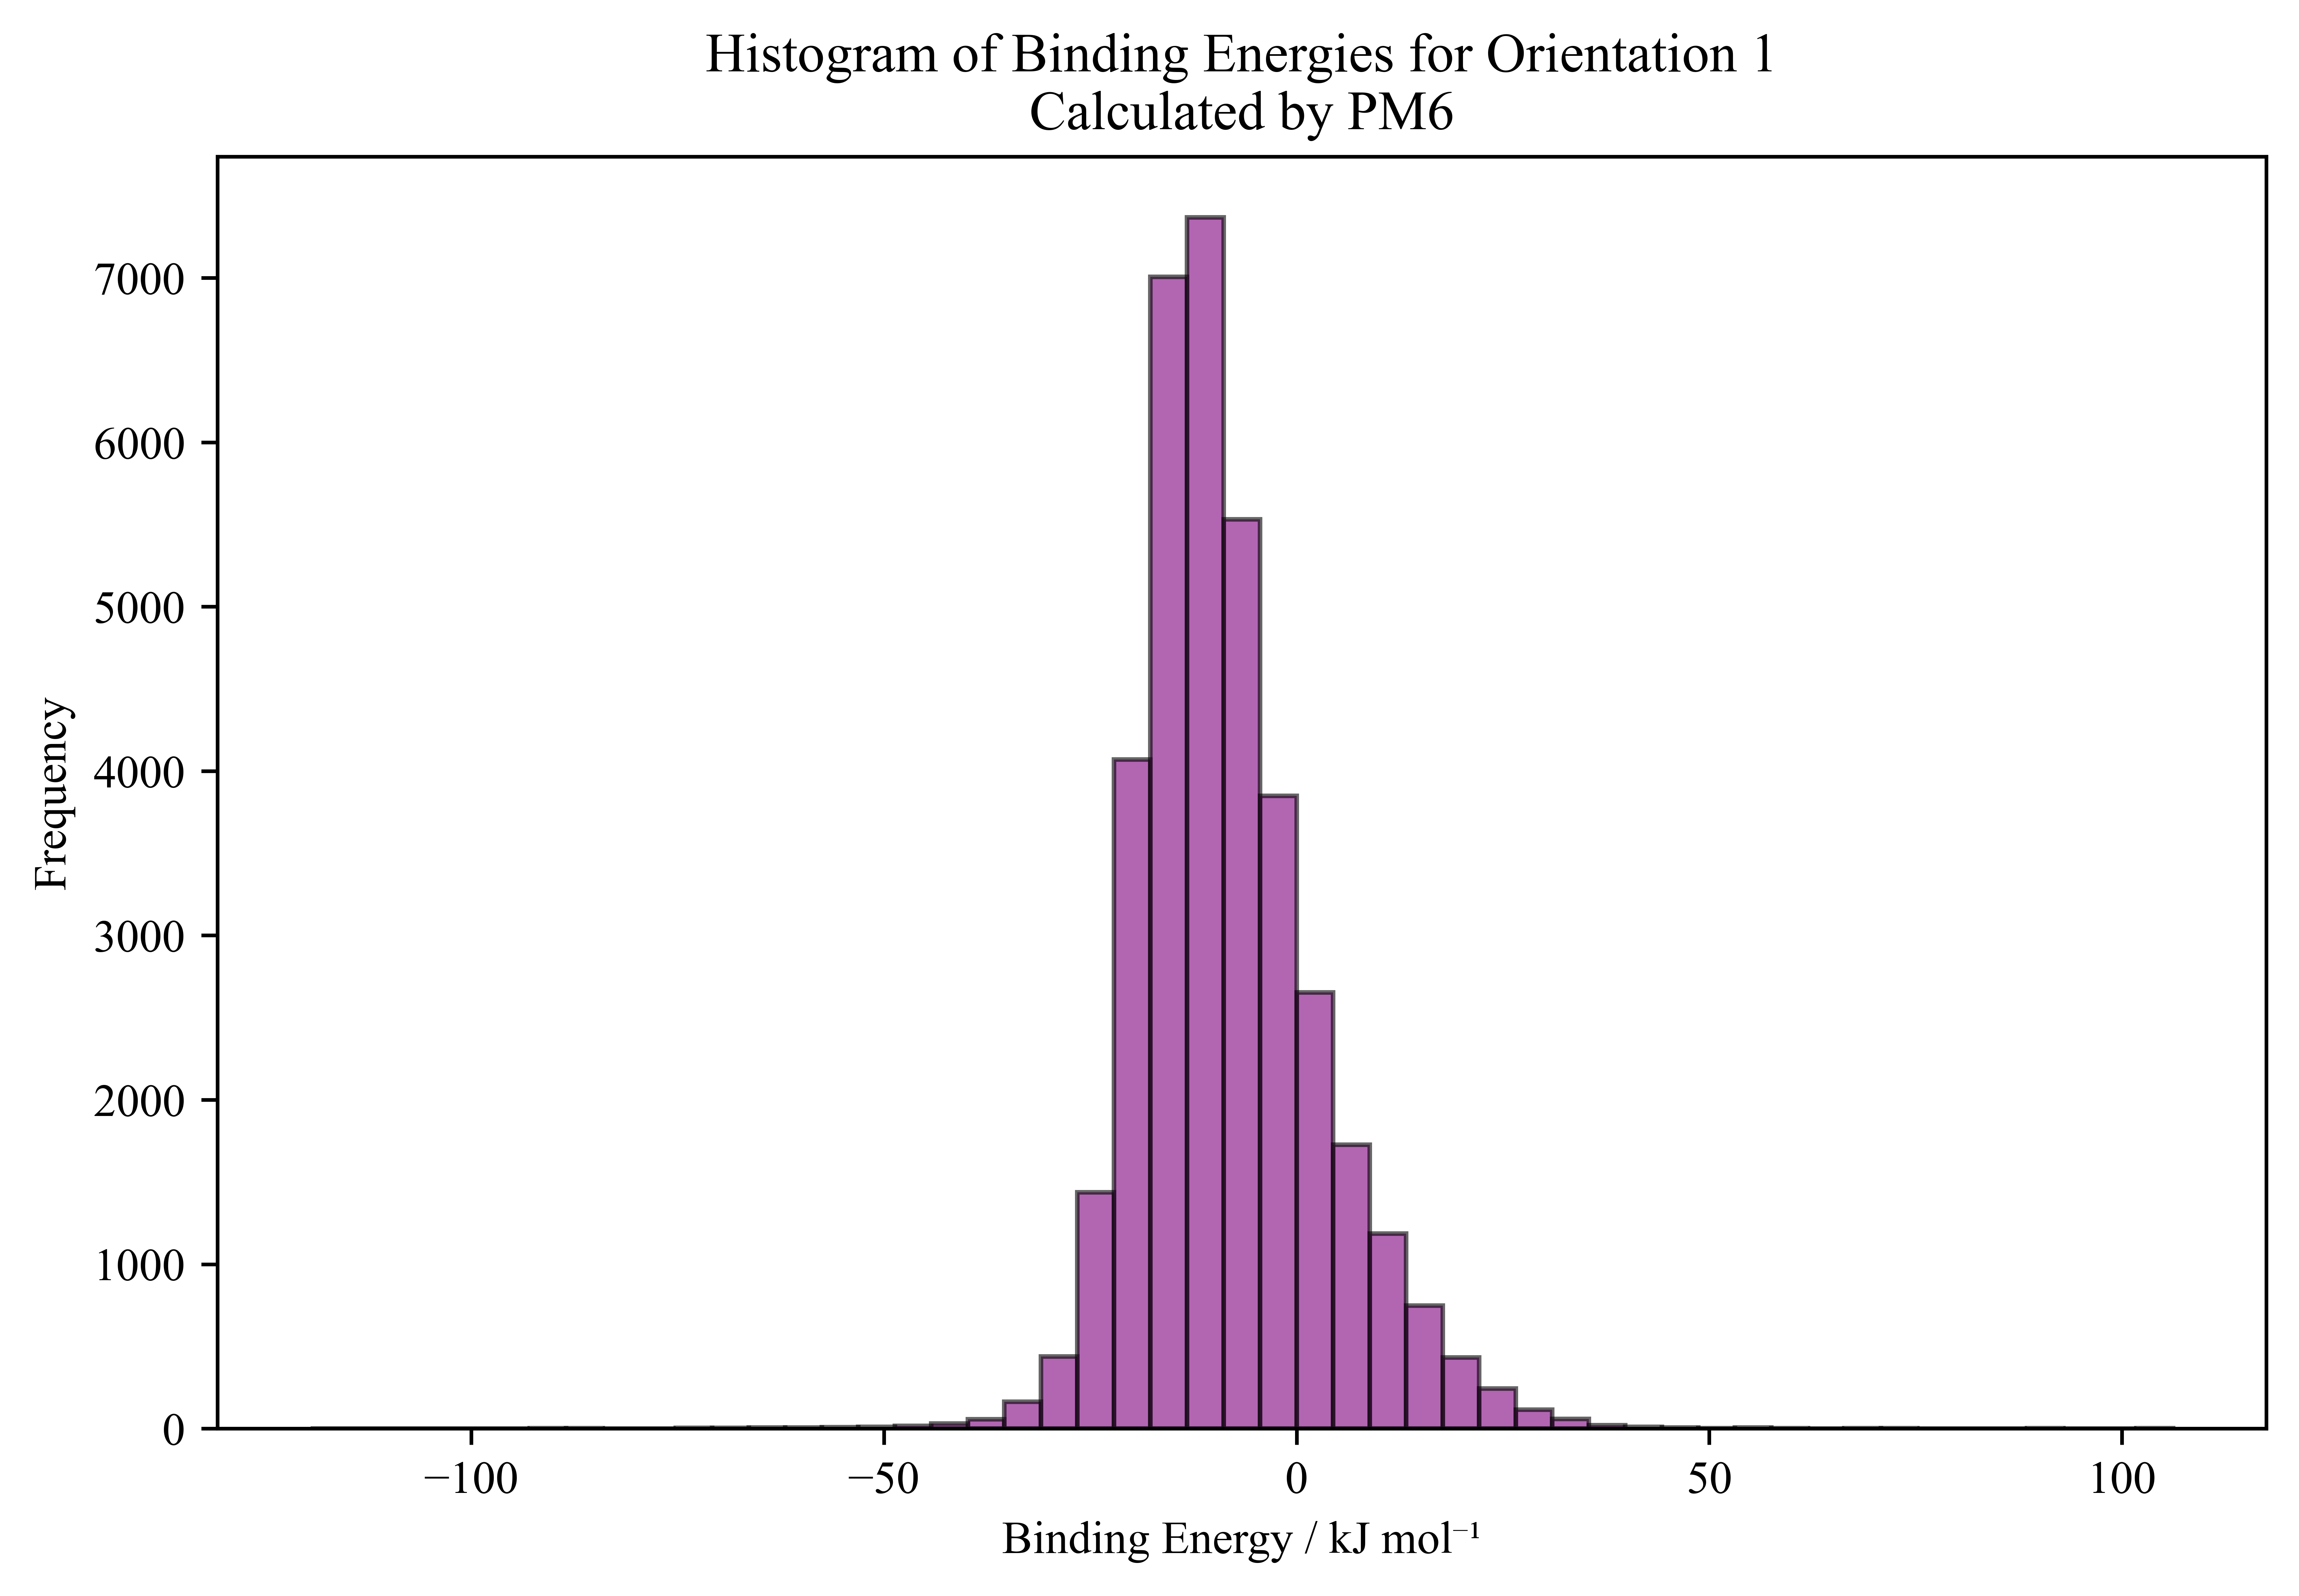

In [15]:
# Define the number of bins
num_bins = 50  

# Calculate bin width
bin_width = (max_value - min_value) / num_bins

# Generate bin edges ensuring 0 is a boundary
start_bin = min_value - (min_value % bin_width)  
bins = np.arange(start_bin, max_value + bin_width, bin_width)

# Ensure 0 is a bin edge
if 0 not in bins:
    bins = np.append(bins, 0)
    bins = np.sort(bins)  

# Plot histogram
plt.figure(figsize=(8, 5), dpi=1000)
plt.hist(df['binding energy / kJ mol-1'], bins=bins, color='purple', alpha=0.6, edgecolor='black')
plt.xlabel('Binding Energy / kJ mol⁻¹')
plt.ylabel('Frequency')
plt.title('Histogram of Binding Energies for Orientation 1\nCalculated by PM6')
plt.rcParams['font.family'] = 'Times New Roman'
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/pm6_orientation_1_hist.png", dpi=1000, bbox_inches='tight')


# Show the plot
plt.show()

C:\Users\sophi\AppData\Local\Temp\ipykernel_12380\896042429.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')


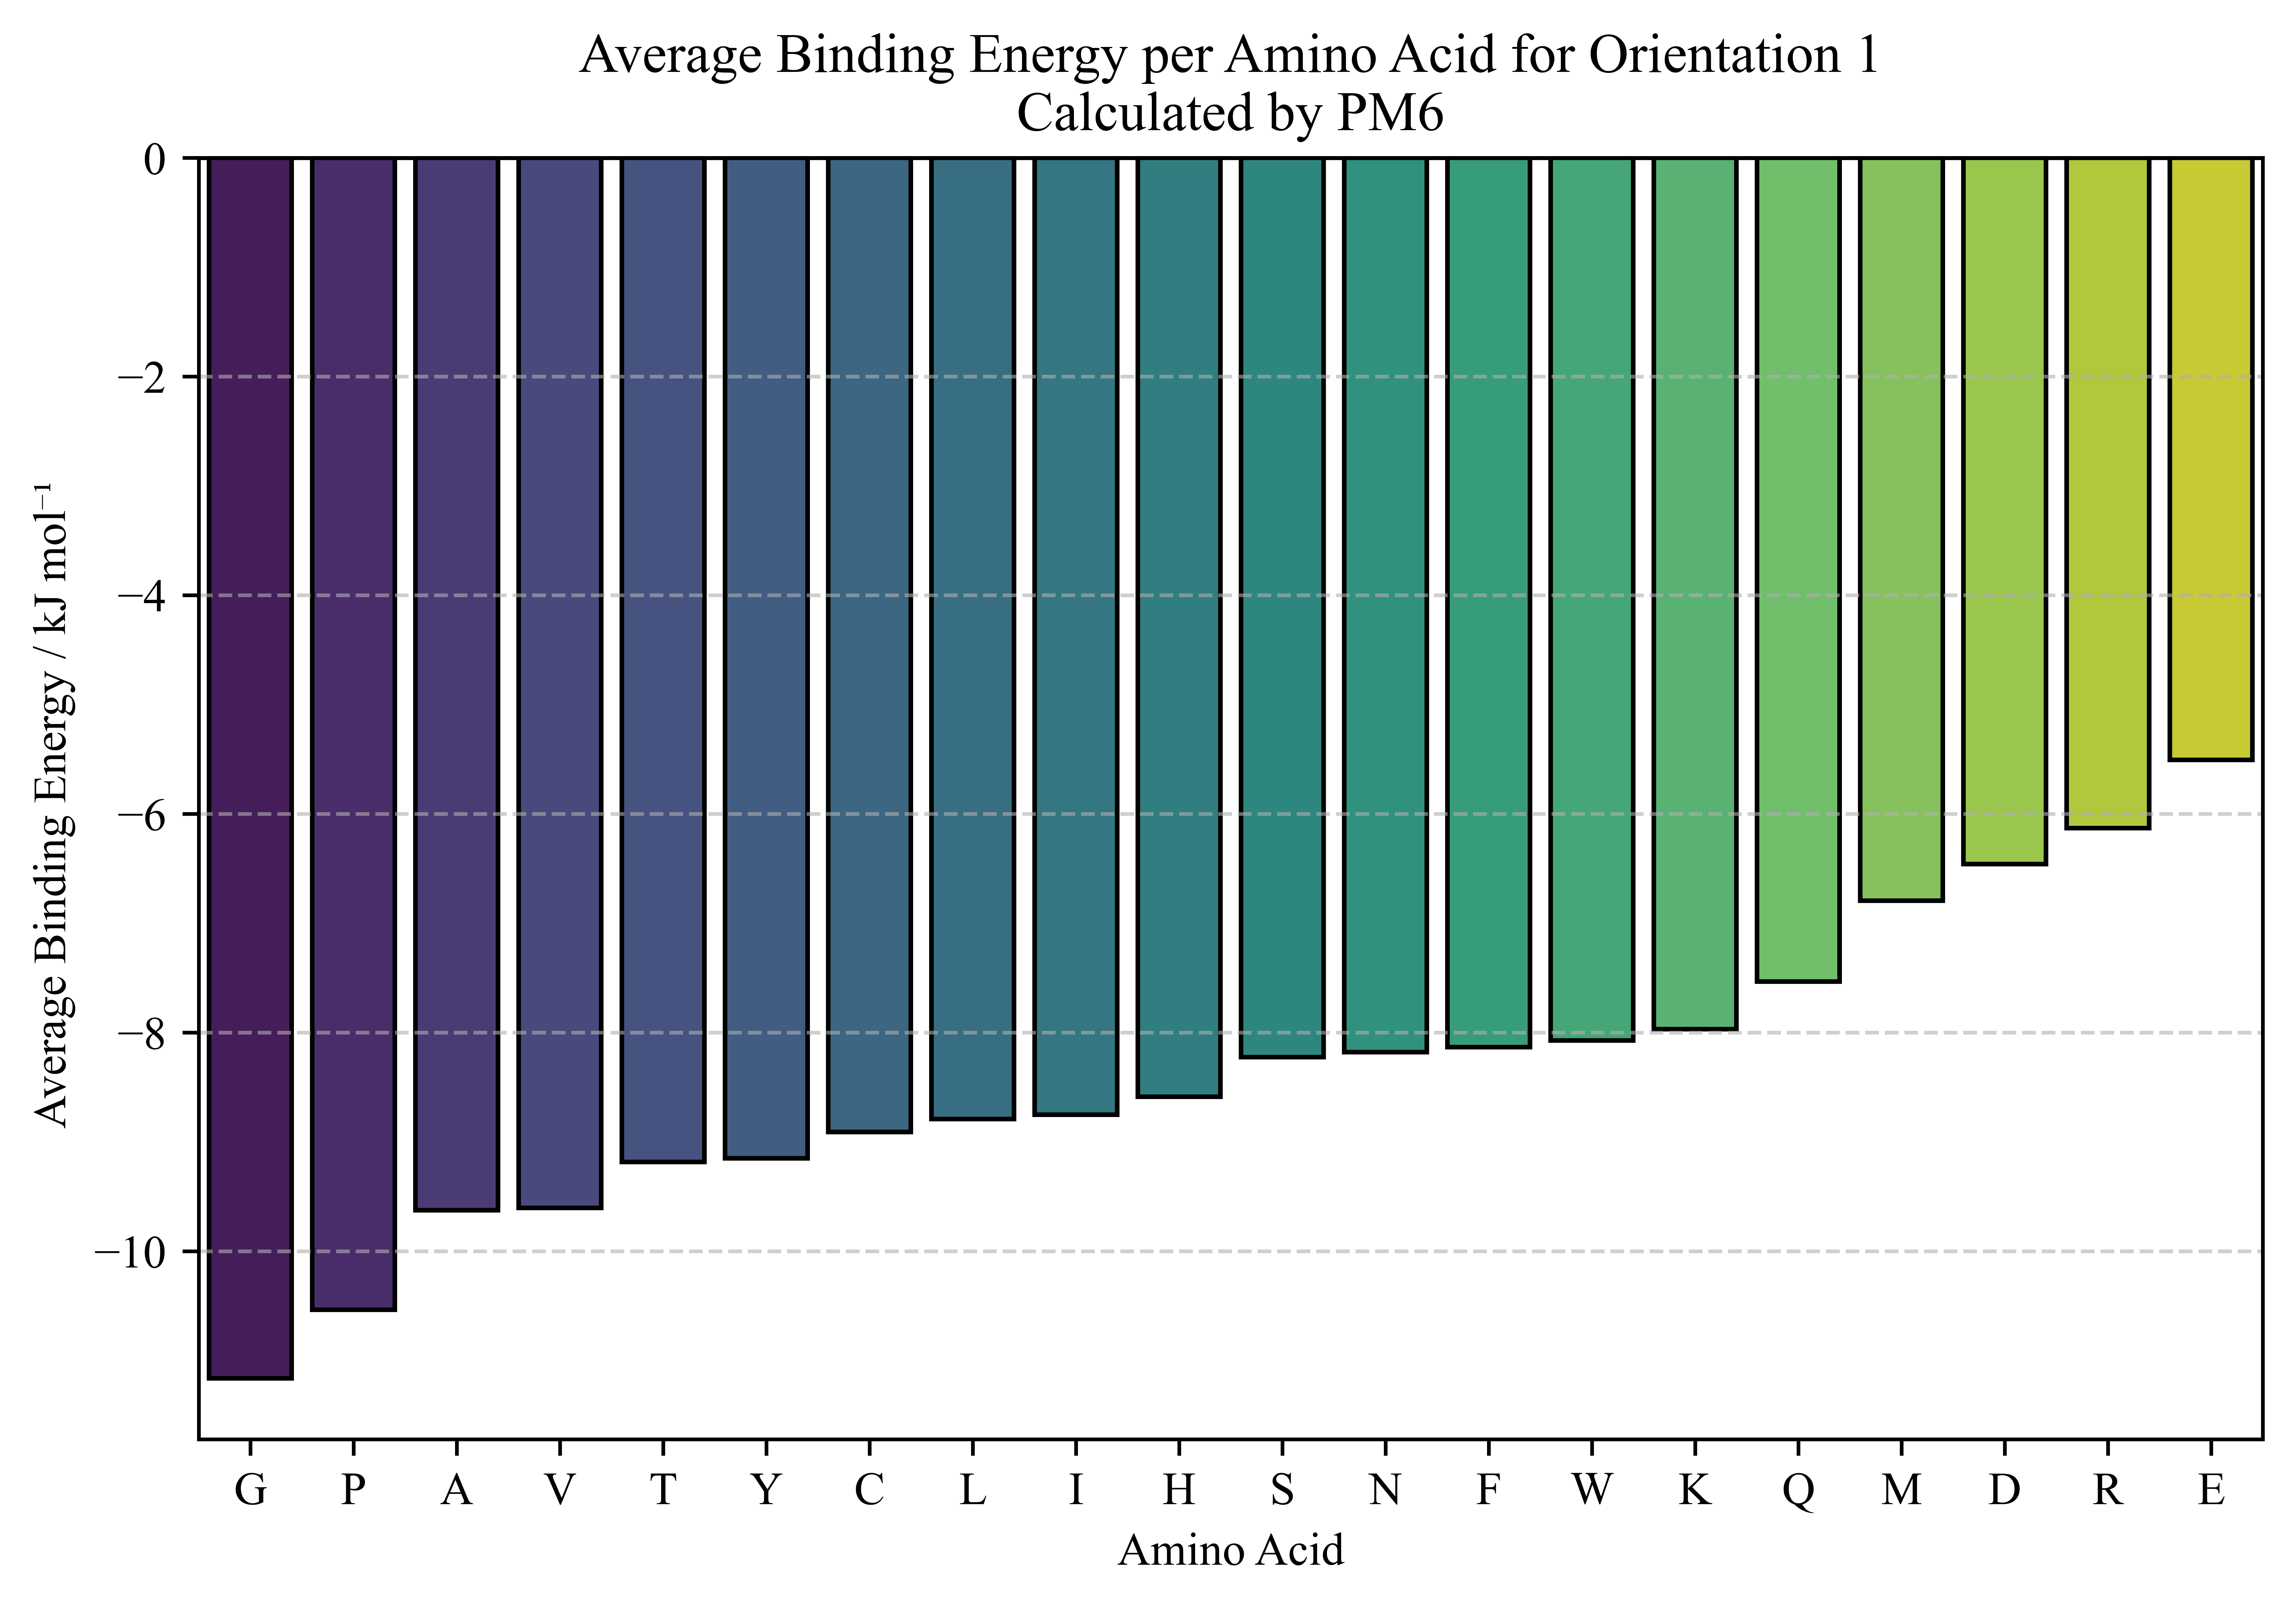

In [13]:
# Dictionary to store summed energies and counts for each amino acid
amino_energy_sum = defaultdict(float)
amino_count = defaultdict(int)

# Process each row in the DataFrame
for _, row in df.iterrows():
    peptide = row['Code']  
    energy = row['binding energy / kJ mol-1']  

    # Distribute energy equally among amino acids in the peptide
    for amino in peptide:
        amino_energy_sum[amino] += energy  
        amino_count[amino] += 1 

# Compute average energy per amino acid
amino_avg_energy = {aa: amino_energy_sum[aa] / amino_count[aa] for aa in amino_energy_sum}

# Convert to DataFrame for plotting
avg_energy_df = pd.DataFrame(amino_avg_energy.items(), columns=['Amino Acid', 'Average Binding Energy'])
avg_energy_df = avg_energy_df.sort_values(by='Average Binding Energy')  # Sort

# Plot the bar chart
plt.figure(figsize=(8, 5), dpi=1000)
sns.barplot(x='Amino Acid', y='Average Binding Energy', data=avg_energy_df, palette='viridis', edgecolor='black')

plt.xlabel("Amino Acid")
plt.ylabel("Average Binding Energy / kJ mol⁻¹ ")
plt.title("Average Binding Energy per Amino Acid for Orientation 1\nCalculated by PM6")
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.rcParams['font.family'] = 'Times New Roman'
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("C:/Users/sophi/OneDrive - University of Leeds/Year 4/Sophie Blanch/Report/images/pm6_avg_binding_per_aa_1_hist.png", dpi=1000, bbox_inches='tight')


plt.show()